# Exercício 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Setting random seed.
seed = 10

In [3]:
# Setting the input samples.
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.double)

# Setting the expected outputs.
y_XOR = np.array([0, 1, 1, 0])

# Creating and training a Perceptron.
p = Perceptron(random_state=seed, eta0=0.1, max_iter=1000) 
p.fit(X, y_XOR)

# Obtaining f(x) scores.
pred_scores = p.decision_function(X)
print("Perceptron's XOR scores: {}".format(pred_scores))

Perceptron's XOR scores: [-0.1 -0.2 -0.1 -0.2]


In [4]:
# Method to plot the Perceptron's decision boundary.
# This code is based on http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 
def plot_decision_boundary(classifier, X, y, title):
    xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05 
    ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05 
    step = 0.01
    cm = plt.cm.coolwarm_r #cm = plt.cm.RdBu
    thr = 0.0
    xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
    if hasattr(classifier, 'decision_function'):
        Z = classifier.decision_function(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
    else:
        Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), alpha=0.6)
    plt.xlim(xmin, xmax) 
    plt.ylim(ymin, ymax)
    plt.xticks((0.0, 1.0)) 
    plt.yticks((0.0, 1.0))
    plt.title(title)

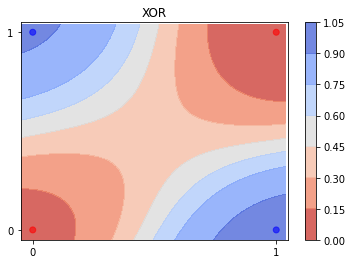

MLP's XOR probabilities:
[class0, class1]
[[0.90824236 0.09175764]
 [0.08283202 0.91716798]
 [0.04569506 0.95430494]
 [0.95730544 0.04269456]]


In [5]:
 # Creating a MLPClassifier.
# hidden_layer_sizes receive a tuple where each position i indicates the number of neurons
# in the ith hidden layer
# activation specifies the activation function (other options are: 'identity', 'logistic' and 'relu') 
# max_iter indicates the maximum number of training iterations
# There are other parameters which can also be changed.
# See http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', max_iter=10000, random_state=seed)

# Training and plotting the decision boundary.
mlp.fit(X, y_XOR) 
plot_decision_boundary(mlp, X, y_XOR, 'XOR') 
plt.show()

pred = mlp.predict_proba(X)
print("MLP's XOR probabilities:\n[class0, class1]\n{}".format(pred))